# Machine Learning with Python

## Loading Libraries

We start by loading the different libraries that we will be using in this tutorial.

In [20]:
#Library for managing the data
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np

#Visualization libraries
import matplotlib as ptl
import seaborn as sns
from matplotlib import pyplot

#Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

#Validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
#Timing
import timeit

## Getting and Preparing the Dataset

Now we can retrieve and prepare the dataset for the analysis.

In [4]:
bcancer = datasets.load_breast_cancer()     
dataset = pd.DataFrame(data=bcancer.data, columns=bcancer.feature_names)
dataset['target'] = bcancer.target
print(dataset)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

## Cleaning the Dataset

Now, we can clean the dataset, we will remove any missing values and correlated variables.

In [5]:
print("--Show NAs per column--\n")
dataClean=dataset.dropna(axis = 0, how = 'any')


--Show NAs per column--



In [6]:
cor_matrix = dataClean.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                         mean radius  mean texture  mean perimeter  mean area  \
mean radius                      NaN      0.323782        0.997855   0.987357   
mean texture                     NaN           NaN        0.329533   0.321086   
mean perimeter                   NaN           NaN             NaN   0.986507   
mean area                        NaN           NaN             NaN        NaN   
mean smoothness                  NaN           NaN             NaN        NaN   
mean compactness                 NaN           NaN             NaN        NaN   
mean concavity                   NaN           NaN             NaN        NaN   
mean concave points              NaN           NaN             NaN        NaN   
mean symmetry                    NaN           NaN             NaN        NaN   
mean fractal dimension           NaN           NaN             NaN        NaN   
radius error                     NaN           NaN             NaN        NaN   
texture error               

/tmp/ipykernel_62146/390329143.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [7]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

['mean perimeter', 'mean area', 'perimeter error', 'area error', 'worst radius', 'worst perimeter', 'worst area']


In [8]:
dataReady = dataClean.drop(to_drop, axis=1)
print(dataReady.head())

   mean radius  mean texture  mean smoothness  mean compactness  \
0        17.99         10.38          0.11840           0.27760   
1        20.57         17.77          0.08474           0.07864   
2        19.69         21.25          0.10960           0.15990   
3        11.42         20.38          0.14250           0.28390   
4        20.29         14.34          0.10030           0.13280   

   mean concavity  mean concave points  mean symmetry  mean fractal dimension  \
0          0.3001              0.14710         0.2419                 0.07871   
1          0.0869              0.07017         0.1812                 0.05667   
2          0.1974              0.12790         0.2069                 0.05999   
3          0.2414              0.10520         0.2597                 0.09744   
4          0.1980              0.10430         0.1809                 0.05883   

   radius error  texture error  ...  symmetry error  fractal dimension error  \
0        1.0950         0.9053

## Initial Visualization of the Data

In this part we will explore the distribution of classes.

<Axes: xlabel='target', ylabel='count'>

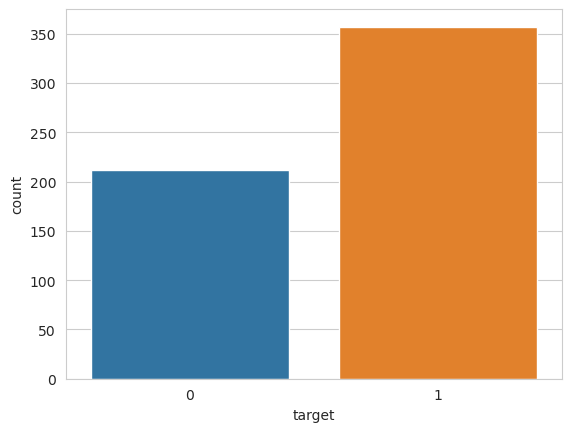

In [9]:
sns.set_style("whitegrid")
sns.countplot(x=dataClean["target"])

## The first Classifier

In this part we will see how to prepare a first classifier

In [10]:
X = dataReady.iloc[:,:-1]                                                                                                                                                   
Y = dataReady.iloc[:,-1]                                                                                                                                           
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, shuffle=True)   
print(X)
print(Y)

     mean radius  mean texture  mean smoothness  mean compactness  \
0          17.99         10.38          0.11840           0.27760   
1          20.57         17.77          0.08474           0.07864   
2          19.69         21.25          0.10960           0.15990   
3          11.42         20.38          0.14250           0.28390   
4          20.29         14.34          0.10030           0.13280   
..           ...           ...              ...               ...   
564        21.56         22.39          0.11100           0.11590   
565        20.13         28.25          0.09780           0.10340   
566        16.60         28.08          0.08455           0.10230   
567        20.60         29.33          0.11780           0.27700   
568         7.76         24.54          0.05263           0.04362   

     mean concavity  mean concave points  mean symmetry  \
0           0.30010              0.14710         0.2419   
1           0.08690              0.07017         0.18

In [11]:
model = SVC(kernel='linear')
model.fit(X_train,Y_train)
predictions=model.predict(X_test)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

[[31  5]
 [ 0 78]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.93        36
           1       0.94      1.00      0.97        78

    accuracy                           0.96       114
   macro avg       0.97      0.93      0.95       114
weighted avg       0.96      0.96      0.96       114



## SVM with Kernels

In this case we will add a Kernel to the SVM

In [12]:
model = SVC(gamma="auto",kernel='rbf')
model.fit(X_train,Y_train)
predictions=model.predict(X_test)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

[[30  6]
 [ 2 76]]
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        36
           1       0.93      0.97      0.95        78

    accuracy                           0.93       114
   macro avg       0.93      0.90      0.92       114
weighted avg       0.93      0.93      0.93       114



## Naive Bayes Classifier

This case is for the Naive Bayes Classifier

In [13]:
model = GaussianNB()
model.fit(X_train,Y_train)
predictions=model.predict(X_test)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

[[32  4]
 [ 3 75]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.95      0.96      0.96        78

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



## Tree-based Algorithm

The example based on trees

In [14]:
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)
predictions=model.predict(X_test)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

[[32  4]
 [ 3 75]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.95      0.96      0.96        78

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



## Random Forest Classifier

Example for Rnadom Forest

In [15]:
model = RandomForestClassifier()
model.fit(X_train,Y_train)
predictions=model.predict(X_test)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

[[34  2]
 [ 1 77]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        36
           1       0.97      0.99      0.98        78

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## Cross-Validation on Machine Learning

This bit focuses on applying different machine learning algorithms directly to the data in order to create classification models that will predict the class of a new input, and validate the models with 10-fold cross-validation.

In [16]:
#We are going to create our machine learning models with the classifiers

#This is a list of models and each of them is going to be a classifier
models=[]
models.append(("Tree",DecisionTreeClassifier()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("NB",GaussianNB()))
models.append(("SVM",SVC(gamma="auto")))
models.append(("RandomForest",RandomForestClassifier()))
models.append(("NNet",MLPClassifier(random_state=1, max_iter=300)))
#This list will accumulate the results
results=[]
names = []


for name, model in models:
        #Normally you divide the training data in 10 blocks (or n blocks) and you use 9 for training and one
        #for testing, then you change the blocks 10 times and you choose form the 10 models that you have 
        #created the best one. This reduces overfitting
        start=timeit.default_timer()
        cv_fold= StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
        cv_results= cross_val_score(model, X_train,Y_train,cv=cv_fold, scoring="accuracy")
        stop=timeit.default_timer()
        results.append(cv_results)
        names.append(name)
        print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
        print("Time: ",stop-start)

Tree: 0.916812 (0.043180)
Time:  0.08434916399983194
KNN: 0.914348 (0.037192)
Time:  0.0681226679998872
NB: 0.907681 (0.039116)
Time:  0.02794022699981724
SVM: 0.912271 (0.049710)
Time:  0.056507661000068765
RandomForest: 0.940725 (0.036610)
Time:  1.6032721790002142


/home/oxford/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/oxford/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/oxford/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/oxford/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/oxford/anaconda3/lib/python3.1

NNet: 0.931787 (0.026955)
Time:  3.6151440059998095


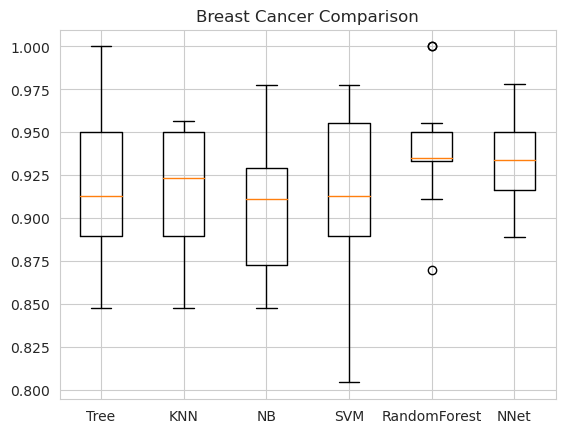

In [17]:
pyplot.boxplot(results, labels=names)
pyplot.title("Breast Cancer Comparison")
pyplot.show()

## ROC Curve

We select the best classifier and show its ROC curve

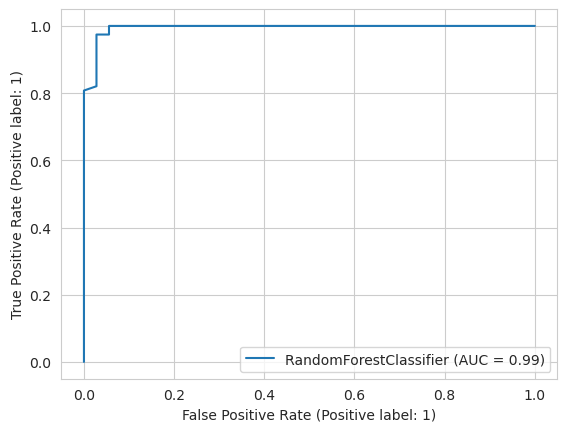

In [22]:
model = RandomForestClassifier()
model.fit(X_train,Y_train)
RocCurveDisplay.from_estimator(model, X_test, Y_test)